In [1]:
#Nichenametla Hima Sree
#BL.EN.U4CSE21137

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv("Skin_Cancer_Metadata.csv")
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [5]:
label_encoding = LabelEncoder()
data['sex'] = label_encoding.fit_transform(data['sex'])
data.to_csv('encoded_skin_cancer.csv', index=False)

In [6]:
data = pd.read_csv("encoded_skin_cancer.csv")
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,1,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,1,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,1,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,1,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,1,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,1,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,1,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,1,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,1,face


In [7]:
data['dx_type'] = label_encoding.fit_transform(data['dx_type'])
data.to_csv('encoded_skin_cancer.csv', index=False)

In [8]:
data['localization'] = label_encoding.fit_transform(data['localization'])
data.to_csv('encoded_skin_cancer.csv', index=False)

In [9]:
label_encoding = LabelEncoder()
data['dx'] = label_encoding.fit_transform(data['dx'])
data.to_csv('encoded_skin_cancer.csv', index=False)

In [10]:
data = pd.read_csv("encoded_skin_cancer.csv")
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,3,40.0,1,0
10011,HAM_0002867,ISIC_0033550,0,3,40.0,1,0
10012,HAM_0002867,ISIC_0033536,0,3,40.0,1,0
10013,HAM_0000239,ISIC_0032854,0,3,80.0,1,5


In [11]:
import warnings
warnings.filterwarnings("ignore")

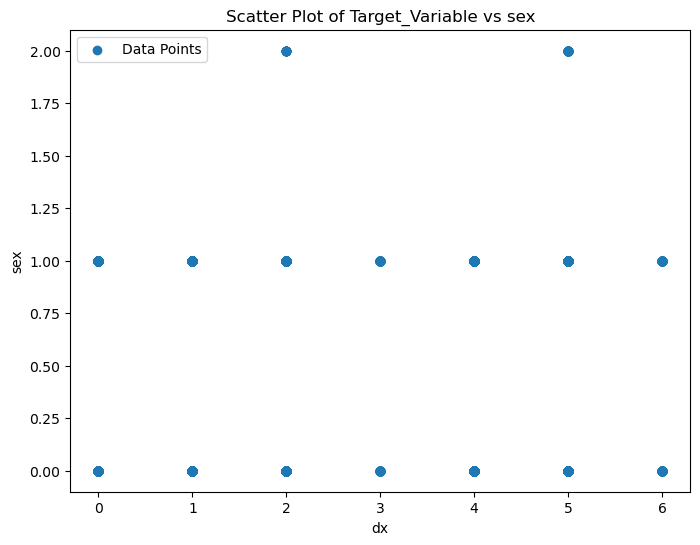

In [14]:
#Linear Regression 
f1 = data['dx']
f2 = data['sex']
plt.figure(figsize=(8, 6))
plt.scatter(f1, f2,marker='o', label='Data Points')
plt.title('Scatter Plot of Target_Variable vs sex')
plt.xlabel('dx')
plt.ylabel('sex')
plt.legend()
plt.show()

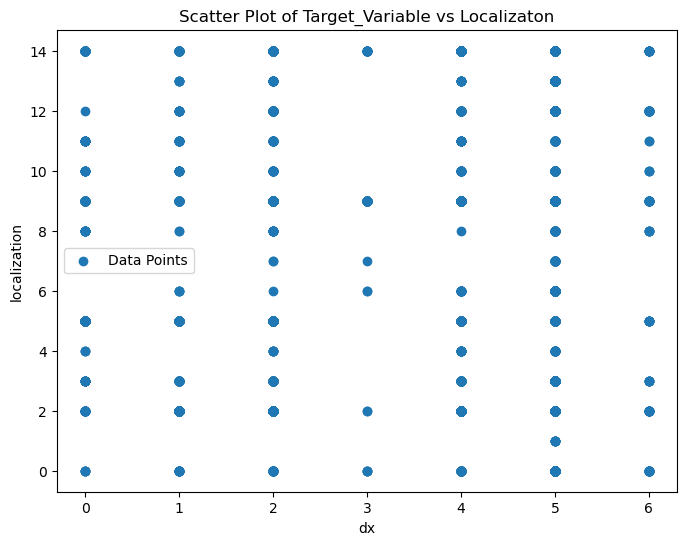

In [15]:
f1 = data['dx']
f2 = data['localization']
plt.figure(figsize=(8, 6))
plt.scatter(f1, f2,marker='o', label='Data Points')
plt.title('Scatter Plot of Target_Variable vs Localizaton')
plt.xlabel('dx')
plt.ylabel('localization')
plt.legend()
plt.show()

In [16]:
data = data.fillna(data.mean())

In [17]:
X = data[['age']]
y = data['dx']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
data.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [21]:
y_pre = model.predict(X_test)
mean_se = mean_squared_error(y_test, y_pre)
rounded_mse = round(mean_se)

print(f"Mean Squared Error: {mean_se}")
print(f"Rounded Mean Squared Error: {rounded_mse}")


Mean Squared Error: 1.6547905450190565
Rounded Mean Squared Error: 2


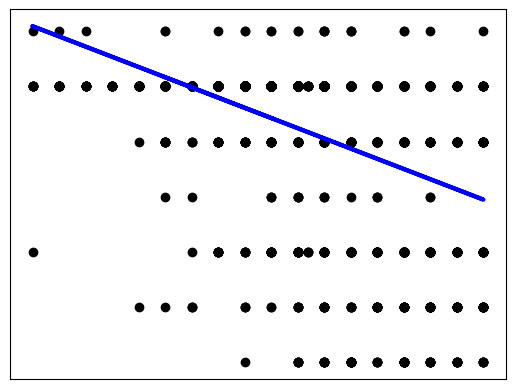

In [23]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pre, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [25]:
data = pd.read_csv("encoded_skin_cancer.csv")
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,3,40.0,1,0
10011,HAM_0002867,ISIC_0033550,0,3,40.0,1,0
10012,HAM_0002867,ISIC_0033536,0,3,40.0,1,0
10013,HAM_0000239,ISIC_0032854,0,3,80.0,1,5


In [26]:
count = data['sex'].nunique()
count

3

In [28]:
sum1 = sum(data['sex'] == 1) #male
print(sum1)
sum2 = sum(data['sex'] == 0) #female
print(sum2)
sum3 = sum(data['sex'] == 2) #other
print(sum3)

5406
4552
57


In [30]:
ds1 = sum(data['dx'] == 0) #akiec
print(ds1)
ds2 = sum(data['dx'] == 1) #bcc
print(ds2)
ds3 = sum(data['dx'] == 2) #bkl
print(ds3)
ds4 = sum(data['dx'] == 3) #df
print(ds4)
ds5 = sum(data['dx'] == 4) #mel
print(ds5)
ds6 = sum(data['dx'] == 5) #nv
print(ds6)
ds7 = sum(data['dx'] == 6) #vasc
print(ds7)

327
514
1099
115
1113
6705
142


In [31]:
#Logistic Regression
data1 = data[data['sex'].isin([0,1])]
data1 = data[data['dx'].isin([4,5])]

X =  data1[['sex']]
y =  data1[['dx']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
model = LogisticRegression(random_state=42, max_iter=100) 
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pre)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.72%


In [33]:
cla_report_str = classification_report(y_test, y_pre)
print("Classification Report:")
print(cla_report_str)

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       239
           5       0.85      1.00      0.92      1325

    accuracy                           0.85      1564
   macro avg       0.42      0.50      0.46      1564
weighted avg       0.72      0.85      0.78      1564



In [34]:
#Regression Tree and k-NN Regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = data[['localization','sex']]
y = data[['dx']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train, y_train)

knn_regressor = KNeighborsRegressor(n_neighbors=3) 
knn_regressor.fit(X_train, y_train)

tree_predictions = tree_regressor.predict(X_test)
knn_predictions = knn_regressor.predict(X_test)

tree_absolute_err = mean_absolute_error(y_test, tree_predictions)
tree_square_err = mean_squared_error(y_test, tree_predictions)

knn_absolute_err = mean_absolute_error(y_test, knn_predictions)
knn_square_err = mean_squared_error(y_test, knn_predictions)

print("Decision Tree Regressor Metrics:")
print("Mean absolute error is :",tree_absolute_err)
print("Mean squared error is :",tree_square_err)

print("k-NN Regressor Metrics:")
print("Mean absolute error is :",knn_absolute_err)
print("Mean squared error is :",knn_square_err)


Decision Tree Regressor Metrics:
Mean absolute error is : 0.9594566691784152
Mean squared error is : 1.7343630032814243
k-NN Regressor Metrics:
Mean absolute error is : 1.1780662339823598
Mean squared error is : 2.350418816220114
